$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# 2. Introducing Mechanical Vibrations By Investigating a Book Oscillating on a Cylindrical Cup

## Introduction

This notebook introduces a single degree of freedom vibratory system of a textbook balancing on a cylindrical coffee cup. The system is implemented as a model that students can interact with in order to visualize its free response and compare the computer simulation to a demonstration in the classroom.

### Learning Objectives

After the completion of this assignment students will be able to:

-   load a specific system
-   view and set parameters (constants, coordinates) on a system
-   create a visualization that depicts the system's configuration
-   compute the system's free response
-   visualize the change in configuration wit respect to the free response
-   interactively adjust the book shape to see the affect on system response
-   understand the concept of natural frequency and its relationship to mass/inertia
-   estimate the period of a sinusoidal vibration from a time series
-   compare a computer simulation result to experimental result

## What are vibrations?

Here we will study a simple vibratory system. A vibrating mechanical system is typically defined as a collection of rigid and flexible objects that interact in a closed envelope. If you set a cylindrical cup on its side and place a book lying flat on top of it, the book will oscillate if initially displaced at a small non-horizontal angle. Note that it oscillates about a horizontal position. This position is called an *equilibrium point*, *equilibrium state*, or *equilibrium configuration* which is a natural position the system comes to when there is no motion. Vibration is formally defined as an *oscillation about an equilibrium*. The video below shows the real system in action:

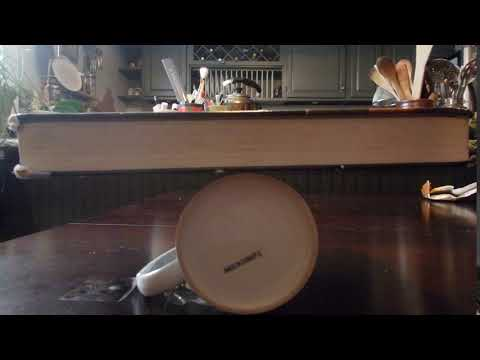

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('B12HbAOKnqI')

During this class, we will examine and explore many different vibratory systems, such as this simple book on a cup system. We will have some live demos, as we are showing now, but in general we will work with computational representations of systems to experiment and learn about the nature of vibration. For example, the following code loads a system that represents the book on a cup. To execute the following Jupyter code cell press the shift and enter key simultaneously:

In [2]:
from resonance.linear_systems import BookOnCupSystem

The line above loads (imports) the command, `BookOnCupSystem`, from the appropriate resonance package. This command can create systems that behave like the live demo. To create a new system append parentheses the command and assign the result that it returns it to a variable called `sys`, execute the following cell:

In [3]:
sys = BookOnCupSystem()

`sys` is now a new system object that you can interact with. This system has many variables and functions associated with it. You can see what the system has and can do by using the Python dot notation. Type `sys.` and press the tab key to see a list of all the variables and functions that are associated with this system.

## Constants

One thing that systems have are different constants, for example this system has geometry, such as the book's thickness and length and the cup's radius. The book also has a mass and, in this case, an underlying assumption is that the book is uniformly dense. Note that all of these do not change with time, i.e. they are constant. You can view all of the constants, which are stored in a Python dictionary by typing:

In [4]:
sys.constants

{'length': 0.238, 'mass': 1.058, 'radius': 0.042, 'thickness': 0.029}

A Python dictionary maps keys, in this case the constant's names, to values, the numerical values you'd like to assign to the constant. For example the key `'thickness'` is associated with a value `0.029`. An individual constant's value can be accessed by using square brackets:

In [5]:
sys.constants['radius']

0.042

You can set the values of the constants as such:

In [6]:
sys.constants['thickness'] = 1.0  # m
sys.constants['width'] = 6.0  # m
sys.constants['length'] = 10.0  # m
sys.constants['radius'] = 3.0  # m
sys.constants['mass'] = 1.0  # kg

*Note that you will be responsible for ensuring that the units are consistent and that all angles should be in radians.* Overwrite the `sys` variable by loading the system again to get back the default constants.

In [7]:
sys = BookOnCupSystem()
sys.constants

{'length': 0.238, 'mass': 1.058, 'radius': 0.042, 'thickness': 0.029}

All systems will have different sets of constants. There is no unique way to define the constants either. For example, we could have chosen area and one linear dimension instead of three linear dimensions. This system could also have more constants, for example what if you were on the moon? Maybe the acceleration due to gravity should be an explicit constant. Or what if the book to cup connection was very slippery? Maybe the coefficient of friction would be a specific constant. It is important to note that the system constants, as we've defined here, are all constant with respect to time.

## Coordinates

There are other system values of interest too. Another very important type are those that vary with time.

> **Exercise**: What might be the time varying parameters of this system?

There are are an infinite number of time varying parameters, but it is often preferable to choose a uniquely simple set of time varying parameters, often called *generalized coordinates*. These coordinates define the **configuration** of the system. In our case, the vertical and horizontal location of the book's mass center could uniquely describe the configuration of the system (if the book can't slip on the cup). But a better choice would be to use the single time varying angle of the books surface relative to horizontal to define the configuration.

<img src="fig/book-balance.svg" alt="image" width="600" />

The angle of the book is thus a generalized coordinate because no fewer number of time varying parameters can possibly be used to describe the configuration. For simple systems, the number of generalized coordinates corresponds to the number of *degrees of freedom* of a system. The degrees of freedom are the number of independent parameters that define the configuration. The non-slipping book on a cup has 1 degree of freedom which is described by the single generalized coordinate, the book's angle. The system's generalized coordinates can be accessed as such:

In [8]:
sys.coordinates

{'book_angle': 0.0}

In [9]:
sys.coordinates['book_angle']

0.0

## Measurements

Another type of time varying parameter that can be extracted from systems are non-generalized coordinates or other combinations of constant parameters. We will call these *measurements*. For example, maybe you are interested in the vertical and horizontal location of the book's lower left corner. If you had an appropriate dynamics distance sensor you could measure this location as it changes with time. Or you can define how these two measurement parameters are a function of the book angle and the system's geometry. You can add measurement parameters to a system by defining Python functions that compute the geometric relationship. Given the value of a generalized coordinate and the values of the system's constant parameters, we can define a function that computes the measurement parameter. These functions need to be to accept scalars and arrays, so import NumPy as a shorthand variable `np` to make use of array aware functions like `np.cos()` and `np.sin()` :

In [10]:
import numpy as np

The thickness of the bottom left corner of the book relative to the origin is defined by this mathematical function:

$$P_y = r + r \cos{\theta} + (r \theta + l / 2) \sin{\theta}$$

and the Python function that implements this would look like:

In [11]:
def bottom_left_y(radius, length, book_angle):
    # define new simpler variables here in the function so the math is
    # is easier to type
    r = radius
    l = length
    theta = book_angle
    return r + r * np.cos(theta) + (r * theta + l / 2) * np.sin(theta)

Note that the variable names in the function signature `(radius, length, book_angle)` must be exactly as you have defined them in the `constants`. This function can now be used like so:

In [12]:
angles = np.deg2rad(np.arange(10))
angles
bottom_left_y(0.042, 0.029, angles)

array([ 0.084     ,  0.08425946,  0.08453162,  0.0848164 ,  0.0851137 ,
        0.08542338,  0.08574532,  0.08607939,  0.08642542,  0.08678326])

Now that you know it works, you can add this measurement function to the system, so that it automatically calculates the measurement for you with:

In [13]:
sys.add_measurement('bottom_left_y', bottom_left_y)

`add_measurement()` is an example of a function that is associated with the system and the parentheses give that away. Similarly, you can add the horizontal position of the bottom left corner:

In [14]:
def bottom_left_x(radius, length, book_angle):
    r = radius
    l = length
    theta = book_angle
    return r * np.sin(theta) - (r * theta + l / 2) * np.cos(theta)

sys.add_measurement('bottom_left_x', bottom_left_x)

Now, if you change the book angle you'll get an updated measurement:

In [15]:
sys.coordinates['book_angle'] = np.deg2rad(1)
sys.measurements['bottom_left_y']

0.086083232844703692

Notice that all angles must be in radians and that we use the NumPy function `np.deg2rad()` to do this.

## Visualizing the Configuration of the System

It is often very helpful to visualize a system's configuration. In this case we need a two dimensional drawing similar to the diagram above. The package `matplotlib` provides "patch" objects that represent a circle and a rectangle that should be able to make a reasonable diagram. First import these functions:

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

And for nice interactive plotting in the Jupyter notebook, use this command to turn it on:

In [17]:
%matplotlib inline

Just as we did with the measurement functions, you can create a function that generates the matplotlib figure using the system's various constants, coordinates, and measurements:

In [18]:
def create_plot(radius, length, thickness, book_angle, bottom_left_x, bottom_left_y):
    # create a blank figure and set basic settings on the axis
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim((-0.15, 0.15))
    ax.set_ylim((0.0, 0.2))
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_aspect('equal')

    # circles are created by supplying an (x, y) pair and the radius
    circ = Circle((0.0, radius), radius=radius)

    # rectangles are created by supplying the (x, y) pair locating the
    # bottom left corner, the width, the thickness, and the to rotation
    # angle. notice that the rotation angle is defined in the opposite
    # direction as we have and it is supposed to be in degrees not radians
    rect = Rectangle((bottom_left_x, bottom_left_y),
                     length, thickness,
                     angle=-np.rad2deg(book_angle),
                     color='black')

    ax.add_patch(circ)
    ax.add_patch(rect)

    return fig

A system can have a single configuration plot function and you let the system know about it by assigning it to the `config_plot_func` variable.

In [19]:
sys.config_plot_func = create_plot

Now, have a look at the configuration plot by calling the function `plot_configuration()` :

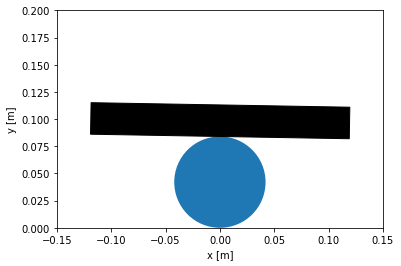

In [20]:
sys.plot_configuration();

> **Exercise:** Change the system's constants and the book angle and see how the plot reflects these changes.

## Free Response

Now that we have a system with defined constant parameters we can make it vibrate. There are two ways to create this motion: apply perturbing forces to the system or set the coordinate to an initial angle other than the equilibrium angle. We will do the later here. The resulting motion is called the *free response* of the system, meaning that no external forces are causing the motion. To simulate the free response of the system, some values of time are needed. In this case a final time value, effectively the duration, is passed into the `free_response()` function. First, set the initial angle of the book and then call `free_repsonse()`, storing the returned result in a variable named `trajectories` :

In [21]:
sys.coordinates['book_angle'] = np.deg2rad(1)
trajectories = sys.free_response(5.0)

This creates what is called a [data frame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Data frames are defined in the [Pandas](http://pandas.pydata.org/) Python package and are one of the most common Python data types. They are essentially a 2D table with labels for each column and an index for each row. In our case the index is the time value and the columns are the values of the coordinates and the measurements at that particular time:

In [22]:
type(trajectories)

pandas.core.frame.DataFrame

In [23]:
trajectories

,book_angle,bottom_left_y,bottom_left_x
time,,,
0.00,0.017453,0.086083,-0.118982
0.01,0.017406,0.086078,-0.118982
0.02,0.017265,0.086061,-0.118982
0.03,0.017031,0.086033,-0.118983
0.04,0.016705,0.085994,-0.118983
0.05,0.016290,0.085944,-0.118984
0.06,0.015786,0.085884,-0.118985
0.07,0.015197,0.085813,-0.118986
0.08,0.014526,0.085733,-0.118987


The data frames have useful plotting functions associated with them, so it is rather easy to plot the various coordinates and measurements versus time:

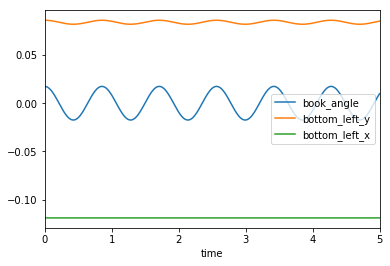

In [24]:
trajectories.plot();

It is often a little clearer if each column is in a subplots, especially if they have different units, as these do:

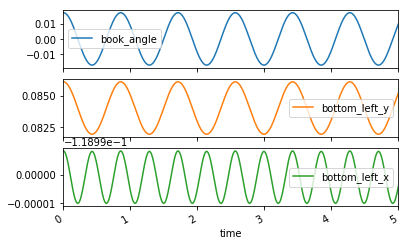

In [25]:
trajectories.plot(subplots=True);

A single column can be accessed and plotted too:

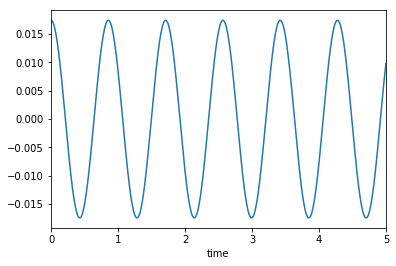

In [26]:
plt.figure()
trajectories['book_angle'].plot();

Maybe you want to use degrees for the book angle instead, just make a new column:

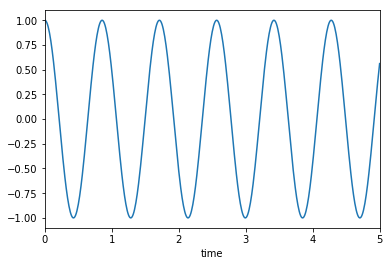

In [27]:
trajectories['book_angle_deg'] = np.rad2deg(trajectories['book_angle'])
plt.figure()
trajectories['book_angle_deg'].plot();

> **Exercise:** Create the free response of the system with different initial coordinate values and parameter values.
>
> -   Does the simulation always work, if not what doesn't work? *Hint: try a tall stack of books, can you find a stack height that is significant?*
> -   What mathematical function can be used describe the change in the book angle?
> -   Why does the book corner x position seem to oscillate faster?

## Animate The Motion

Now that we we have a time varying response, we can animate the configuration figure to visualize how the system moves. There is one minor change that needs to be made to the configuration plot function first. We need to make sure that it also returns any of the objects that change with time. Update the function by add the `Rectangle` as a second returned value:

In [28]:
def create_plot(radius, length, thickness, book_angle, bottom_left_x, bottom_left_y):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim((-0.15, 0.15))
    ax.set_ylim((0.0, 0.2))
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_aspect('equal')

    circ = Circle((0.0, radius), radius=radius)

    # NOTE : The rectangle's position and angle will change with time.
    rect = Rectangle((bottom_left_x, bottom_left_y),
                     length, thickness,
                     angle=-np.rad2deg(book_angle),
                     color='black')

    ax.add_patch(circ)
    ax.add_patch(rect)

    # make sure to return the rectangle, which moves at each time step!
    return fig, rect

sys.config_plot_func = create_plot

Now, an animation update function can be created which updates the bottom left corner's x and y coordinate at each time step. The last argument in the function signature must be the object(s) that changes.

In [29]:
def update_frame(book_angle, bottom_left_x, bottom_left_y, rect):
    rect.set_xy((bottom_left_x, bottom_left_y))
    rect._angle = -np.rad2deg(book_angle)

Lastly, add this function to the system:

In [30]:
sys.config_plot_update_func = update_frame

The visualization can now be animated with:

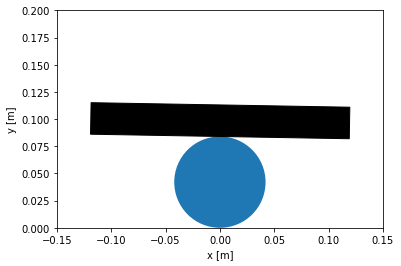

In [31]:
sys.animate_configuration(interval=8)

The interval parameter helps speed it up closer to real time. See the documentation for matplotlib's [FuncAnimation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation) for more options.

> **Exercise:** There is a special variable `time` that can be specified in the plot setup and update functions. Add this variable to the function signatures and create some text on the plot that displays the current time using:
>
> -   `text = ax.text(-0.125, 0.025, 'Time = {:0.3f} s'.format(time))`
> -   `text.set_text('Time = {:0.3f} s'.format(time))`

## Time Series Analysis

Now that we have some data produced from the simulation we can see how it compares to what we can measure in real life.

> **Exercise:** Either using the video of the oscillation or the demo available in the classroom, count the number of oscillations in a few seconds and compute the period of the oscillation.
>
> **Exercise:** From the above plots you can see that the oscillation is periodic and sinusoidal. Using your program, create a function that calculates the period of the oscillations to three significant figures when the initial book angle is 2 degrees. Compare the period predicted by the system to the period measured in class. You can also compare it to the value given from `sys.period()`.
>
> *Hint: Look for sign changes with np.sign(), use boolean indexing to extract important times, and finally np.diff() and np.mean() can be useful for finding the delta times and averaging. Note that np.diff() returns one fewer item in the array it operates on.*

In [32]:
def find_period(time, theta):
    """Computes the period of oscillation based on the trajectory of theta.

    Parameters
    ==========
    time : array_like, shape(n,)
        An array of monotonically increasing time values.
    theta : array_like, shape(n,)
        An array of values for theta at each time in ``t``.

    Returns
    =======
    period : float
        An estimate of the period of oscillation.

    """
    # delete the following line and replace with your code
    period = None

    return period

find_period(trajectories.index, trajectories.book_angle)

> **Exercise:** Plot the period versus change in mass, length, and radius. Is there anything interesting about these plots? Explain you interpretations in a markdown cell.